# New York - Multiple Linear Regression

![title](image/brandon-jacoby-306202-unsplash.jpg)

## Exploratory Data Analysis

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("streeteasy.csv")
# Photo by Brandon Jacoby

In [24]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [25]:
df.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

In [26]:
df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training Set // Test Set

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
# Manhattan sub Set
streeteasy_manhattan = pd.read_csv("manhattan.csv")

In [30]:
streeteasy_manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [31]:
streeteasy_manhattan.dtypes

rental_id             int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
borough              object
dtype: object

In [32]:
streeteasy_manhattan.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Create x and y

In [34]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',  'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

## Training Set 80% Test Set 20%

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [36]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000, 1)
(1000, 1)


## Multiple Linear Regression: Scikit-Learn

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# Create Linear Regression Model
mlr = LinearRegression()
# Fit the model
mlr.fit(x, y)
# Preditc y values
y_predict = mlr.predict(x_test)

In [40]:
# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 0, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2150.55


## Visualizing Results with Matplotlib

In [42]:
import matplotlib.pyplot as plt

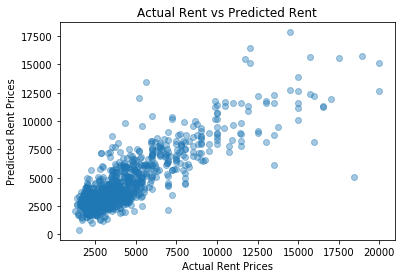

In [47]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent Prices")
plt.ylabel('Predicted Rent Prices')
plt.title('Actual Rent vs Predicted Rent')
plt.show()

## Multiple Linear Regression Equation

$ y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}y=b+m$

Here, $m1$, $m2$, $m3$, ... $mn$ refer to the coefficients, and $b$ refers to the intercept that you want to find. 

You can plug these values back into the equation to compute the predicted $y$ values

The `.fit()` method gives the model two variables that are useful to us:

`.coef_`, which contains the coefficients
`.intercept_`, which contains the intercept

In [49]:
print(mlr.coef_)
print(mlr.intercept_)

[[-455.42616521 1363.22512049    4.65759237  -16.90306568   38.96214386
    -4.2521513   -85.29624635   41.76410842  171.30273732  -37.08149816
   238.35804859   34.85815899  -42.72643278  -55.94577412]]
[-1040.03615673]


## Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.

The difference between the actual value $y$, and the predicted value $ŷ$ is the residual $e$. The equation is:

$ e = y - \hat{y} $

In the StreetEasy dataset, $y$ is the actual rent and the $ŷ$ is the predicted rent. The real $y$ values should be pretty close to these predicted $y$ values.

sklearn's `linear_model.LinearRegression` comes with a `.score()` method that returns the coefficient of determination R² of the prediction.

The coefficient R² is defined as:

$ 1 - \frac{u}{v}$

where $u$ is the residual `sum` of squares:

`((y - y_predict) ** 2).sum()`

and $v$ is the total `sum` of squares (TSS)

`((y - y.mean()) ** 2).sum()`

The TSS tells you how much variation there is in the $y$ variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict `rent` based on the `size_sqft` and the bedrooms in the apartment and the R² for our model is $0.72$ — that means that all the $x$ variables (square feet and number of bedrooms) together explain $72\%$ variation in $y$ (rent).

Now let's say we add another $x$ variable, building's age, to our model. By adding this third relevant $x$ variable, the R² is expected to go up. Let say the new R² is $0.95$. This means that square feet, number of bedrooms and age of the building together explain $95\%$ of the variation in the rent.

The best possible R² is $1.00$ (and it can be negative because the model can be arbitrarily worse). Usually, a R² of $0.70$ is considered good.

0.7725460559817883
0.8050371975357634


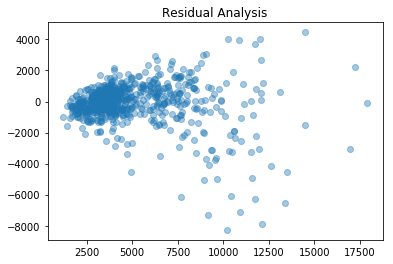

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()

model=mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

# Input code here:
print(model.score(x_train, y_train)) # 0.7725460559817883

print(model.score(x_test, y_test)) # 0.8050371975357647

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()

## Rebuild the Model

### Manhattan

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

manhattan = pd.read_csv("manhattan.csv")

df = pd.DataFrame(manhattan)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_elevator', 'has_dishwasher', 'has_patio']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))


Train score:
0.77229152725315
Test score:
0.8047981749836332


### Brooklyn

In [62]:
brooklyn = pd.read_csv("brooklyn.csv")

df = pd.DataFrame(brooklyn)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_elevator', 'has_dishwasher', 'has_patio']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

Train score:
0.6105309107500678
Test score:
0.5862296795343077


### Queens

In [63]:
queens = pd.read_csv("queens.csv")

df = pd.DataFrame(queens)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_elevator', 'has_dishwasher', 'has_patio']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

Train score:
0.6654372362810952
Test score:
0.6676558145066496
